In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix


In [2]:
file_path_false = 'Cleaned_False_Data.csv'  # Replace with your file path
file_path_true = 'Cleaned_True_Data.csv'   # Replace with your file path
df_false = pd.read_csv(file_path_false)
df_true = pd.read_csv(file_path_true)

In [3]:
df_false['Label'] = 0  # False articles
df_true['Label'] = 1   # True articles
df_combined = pd.concat([df_false, df_true], ignore_index=True)

In [4]:
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)


In [5]:
df_combined = df_combined[['Content', 'Label']].dropna()


In [6]:
X = df_combined['Content']
y = df_combined['Label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [12]:
logistic_model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [13]:
y_pred = logistic_model.predict(X_test_tfidf)
y_pred_proba = logistic_model.predict_proba(X_test_tfidf)[:, 1]


In [14]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [15]:
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9859774744536436
ROC AUC Score: 0.99818011532637

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7044
           1       0.98      0.99      0.99      6363

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407


Confusion Matrix:
 [[6933  111]
 [  77 6286]]


In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [17]:
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

In [20]:
X_pca = pd.DataFrame(
    data=np.vstack((X_train_pca, X_test_pca)), 
    columns=['PC1', 'PC2']
)
y_combined = pd.concat([y_train.reset_index(drop=True), y_test.reset_index(drop=True)], ignore_index=True)


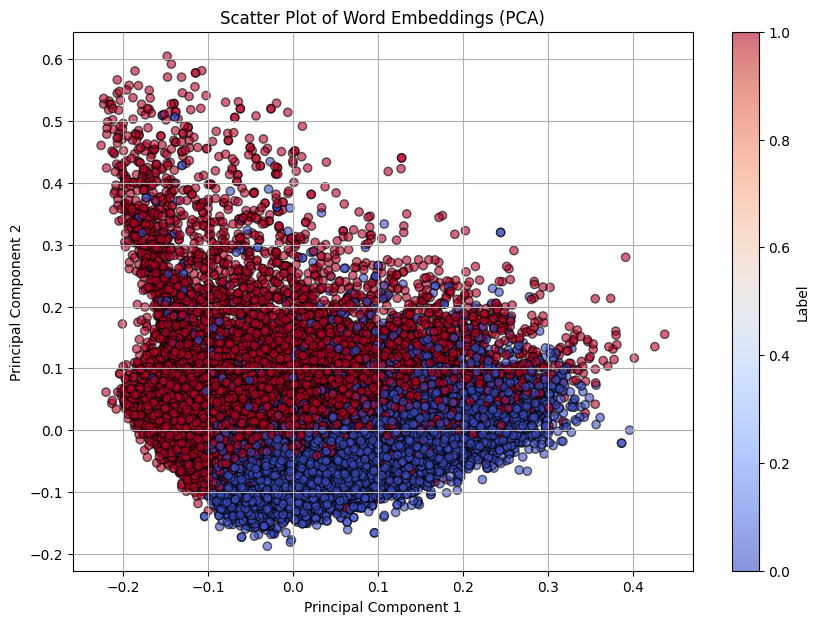

In [21]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca['PC1'], X_pca['PC2'], 
    c=y_combined, cmap='coolwarm', alpha=0.6, edgecolors='k'
)
plt.colorbar(scatter, label='Label')
plt.title('Scatter Plot of Word Embeddings (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [22]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = logistic_model.coef_.flatten()

In [23]:
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
top_features = feature_names[sorted_indices][:20]  # Top 20 features
top_coefficients = coefficients[sorted_indices][:20]


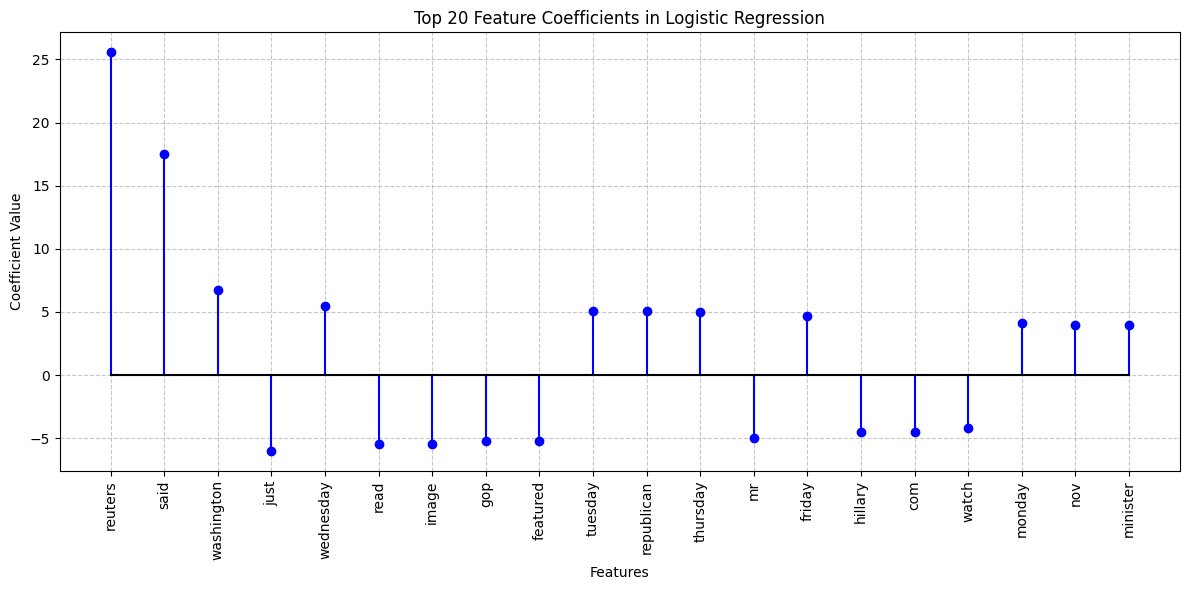

In [24]:
plt.figure(figsize=(12, 6))
markerline, stemlines, baseline = plt.stem(
    range(len(top_coefficients)), top_coefficients, linefmt='b-', markerfmt='bo', basefmt="k-"
)
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.title('Top 20 Feature Coefficients in Logistic Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()